<a href="https://colab.research.google.com/github/Pilarppk/SIM_YAC_PARRALES_UPSE2023/blob/main/Comparacion%20de%20metdos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import math


In [60]:
L=10000 #distancia del yacimiento
dx=500 #distancia eentre nodos
Tiempo= 100000 #tiempo total
DT=1 #delta tiempo
K=50 #permeabilidad MD
Por=0.2 #porosidad
vis=1 # viscosidad en ceentipoy
Beta=1
Comptotal=1**(-6) #psi-1
A=200000 #area ft**2


In [61]:
Alpha=K/(vis*Por*Comptotal) 
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

0.001

In [62]:
#esquema explicito
def Presdt(P0,P1,P2,Eta):
 Pdt=P1+Eta*(P0-2*P1+P2)
 return(Pdt)
 
Pexplicita=np.zeros((Tiempo//DT,L//dx))

In [63]:
#condiciones iniciales
Pyac=1000
Piz=0
Pder=500
Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
Pin

array([   0., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000.,  500.])

In [64]:
t=DT
Pexplicita[0]=Pin
Pexplicita.shape
while t<Tiempo: #ciclo de tiempo
  for i in range(0,len(Pin)-1):#ciclo de espacio
    if i==0:
      Pres[i]=Pin[0]
    elif i==len(Pin)-1:
      Pres[i]=Pin[len(Pin)-1]
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)
  Pexplicita[t//DT]=Pres
  t=t+DT
  Pin=Pres
  

In [65]:
Pexplicita #todas las presiones

array([[   0.        , 1000.        , 1000.        , ..., 1000.        ,
        1000.        ,  500.        ],
       [   0.        ,  999.        , 1000.        , ..., 1000.        ,
         999.5       ,    0.        ],
       [   0.        ,  998.002     ,  999.998002  , ...,  999.9995    ,
         998.5009995 ,    0.        ],
       ...,
       [   0.        ,   13.63312961,   26.89401597, ...,   26.88851639,
          13.62996975,    0.        ],
       [   0.        ,   13.63275736,   26.89328164, ...,   26.88778222,
          13.6295976 ,    0.        ],
       [   0.        ,   13.63238513,   26.89254734, ...,   26.88704806,
          13.62922545,    0.        ]])

In [66]:
#esquema implicito

Pimplicita=np.zeros((Tiempo//DT,L//dx))
Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=L//dx
Matriz_resolution=np.zeros([N-2,N-2])

In [68]:
for i in range(N-2):
  Matriz_resolution[i,i]=1+2*Eta
  if i>0:
    Matriz_resolution[i,i-1]=-Eta
  if i<(N-3):
    Matriz_resolution[i,i+1]=-Eta



In [69]:
Pcal=np.zeros([N-2]) #guardar resultados
Pcal=np.linalg.solve(Matriz_resolution,Pin[1:-1])

In [70]:
Pcal

array([ 999.00199501,  999.99900399,  999.99999901, 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        ,  999.99999901,
        999.99900399,  999.00199501])

In [71]:
Pres=np.concatenate(([Piz],Pcal,[Pder])) #tomar varios valores y juntarlos(Pfrontera)
Pres

array([   0.        ,  999.00199501,  999.99900399,  999.99999901,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
        999.99999901,  999.99900399,  999.00199501,  500.        ])

In [72]:
#presion implicita
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolution,Pin[1:-1])
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pin=Pres
  t=t+DT

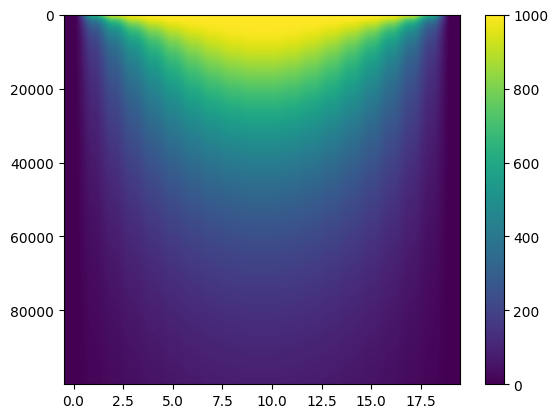

In [73]:

import matplotlib.pyplot as plt
imgplot=plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()

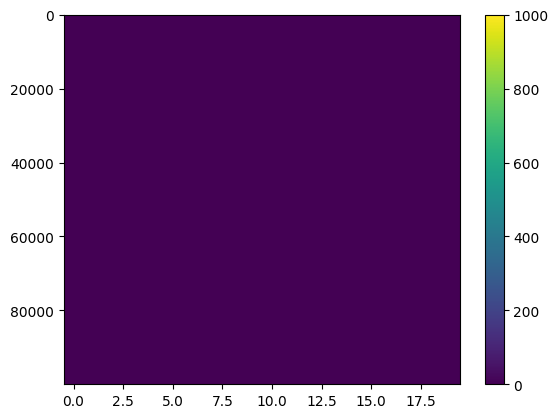

In [75]:
import matplotlib.pyplot as plt
imgplot=plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()